<a href="https://colab.research.google.com/github/arjun1829/Minor-project-verzeo/blob/main/ML_MAJOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from spellchecker import SpellChecker
sns.set_style(style='darkgrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset = pd.read_csv("Information.csv",engine='python')

In [ ]:
col=dataset.columns.tolist()

In [ ]:
col

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'gender',
 'gender:confidence',
 'profile_yn',
 'profile_yn:confidence',
 'created',
 'description',
 'fav_number',
 'gender_gold',
 'link_color',
 'name',
 'profile_yn_gold',
 'profileimage',
 'retweet_count',
 'sidebar_color',
 'text',
 'tweet_coord',
 'tweet_count',
 'tweet_created',
 'tweet_id',
 'tweet_location',
 'user_timezone']

In [ ]:
col_null={}
for c in col:
    col_null[c] = dataset[c].isnull().values.any()
col_null

{'_unit_id': False,
 '_golden': False,
 '_unit_state': False,
 '_trusted_judgments': False,
 '_last_judgment_at': True,
 'gender': True,
 'gender:confidence': True,
 'profile_yn': False,
 'profile_yn:confidence': False,
 'created': False,
 'description': True,
 'fav_number': False,
 'gender_gold': True,
 'link_color': False,
 'name': False,
 'profile_yn_gold': True,
 'profileimage': False,
 'retweet_count': False,
 'sidebar_color': False,
 'text': False,
 'tweet_coord': True,
 'tweet_count': False,
 'tweet_created': False,
 'tweet_id': False,
 'tweet_location': True,
 'user_timezone': True}

In [ ]:
dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ‰ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [ ]:
dataset_new = dataset.drop(['user_timezone','tweet_location','tweet_coord','tweet_created','sidebar_color','profileimage','link_color','fav_number','description','profile_yn:confidence','_last_judgment_at','_unit_id','_golden','_unit_state','gender_gold','name','profile_yn_gold','tweet_id','created'],axis=1)

In [ ]:
dataset_new.dropna(inplace=True)

In [ ]:
clean_text=[]
for i in dataset_new['text']:
    message = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", i)
    message = re.sub(r"[,@\'?\:.$%_]", "",message)
    message = re.sub('[^a-zA-Z/:.\d]',' ',message)
    message = re.sub(r"\s+"," ", message)
    message = message.lower()
    message = message.split()
    ps = PorterStemmer()
    all_words = stopwords.words('english')
    message = [ps.stem(word) for word in message if not word in set(all_words)]
    message = ' '.join(message)
    clean_text.append(message)

In [ ]:
dataset_new['clean_text']=clean_text
print(dataset_new['clean_text'][0])

robbi e respond critic win eddi edward worldtitleseri


In [ ]:
dataset_new.drop('text',inplace=True,axis=1)
dataset_new = dataset_new[(dataset_new['gender'] == 'male') | (dataset_new['gender'] == 'female')]
dataset_new = dataset_new[dataset_new['gender:confidence'] == 1]

In [ ]:
dataset_new

,_trusted_judgments,gender,gender:confidence,profile_yn,retweet_count,tweet_count,clean_text
0,3,male,1.0,yes,0,110964,robbi e respond critic win eddi edward worldti...
1,3,male,1.0,yes,0,7471,felt like friend live stori retir ian1
3,3,male,1.0,yes,0,1693,hi jordanspieth look url use ifttt dont typic ...
4,3,female,1.0,yes,0,31462,watch neighbour sky catch neighb xxx xxx
5,3,female,1.0,yes,0,20036,ive seen peopl train lamp chair tv etc
...,...,...,...,...,...,...,...
20044,227,female,1.0,yes,0,6669,need ride home practic rain hard asf
20045,259,female,1.0,yes,0,783,lookupondeath fine ill drink tea love
20046,248,male,1.0,yes,0,13523,greg hardi good player dont get face dez bryan...
20047,264,male,1.0,yes,0,26419,miss peopl still never want see


In [ ]:
text_len = dataset_new['clean_text'].apply(len)

In [ ]:
dataset_new['text_len'] = text_len

In [ ]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _trusted_judgments  10020 non-null  int64  
 1   gender              10020 non-null  object 
 2   gender:confidence   10020 non-null  float64
 3   profile_yn          10020 non-null  object 
 4   retweet_count       10020 non-null  int64  
 5   tweet_count         10020 non-null  int64  
 6   clean_text          10020 non-null  object 
 7   text_len            10020 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 704.5+ KB


In [ ]:
dataset_new.describe()

,_trusted_judgments,gender:confidence,retweet_count,tweet_count,text_len
count,10020.000000,10020.0,10020.000000,1.002000e+04,10020.000000
mean,3.592914,1.0,0.066866,2.736284e+04,53.115469
std,12.116621,0.0,1.629073,6.658637e+04,21.676581
min,3.000000,1.0,0.000000,1.000000e+00,0.000000
25%,3.000000,1.0,0.000000,2.190000e+03,36.000000
50%,3.000000,1.0,0.000000,8.869500e+03,53.000000
75%,3.000000,1.0,0.000000,2.804025e+04,70.000000
max,274.000000,1.0,153.000000,2.680199e+06,124.000000


In [ ]:
dataset_new['profile_yn'].unique()

array(['yes'], dtype=object)

c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


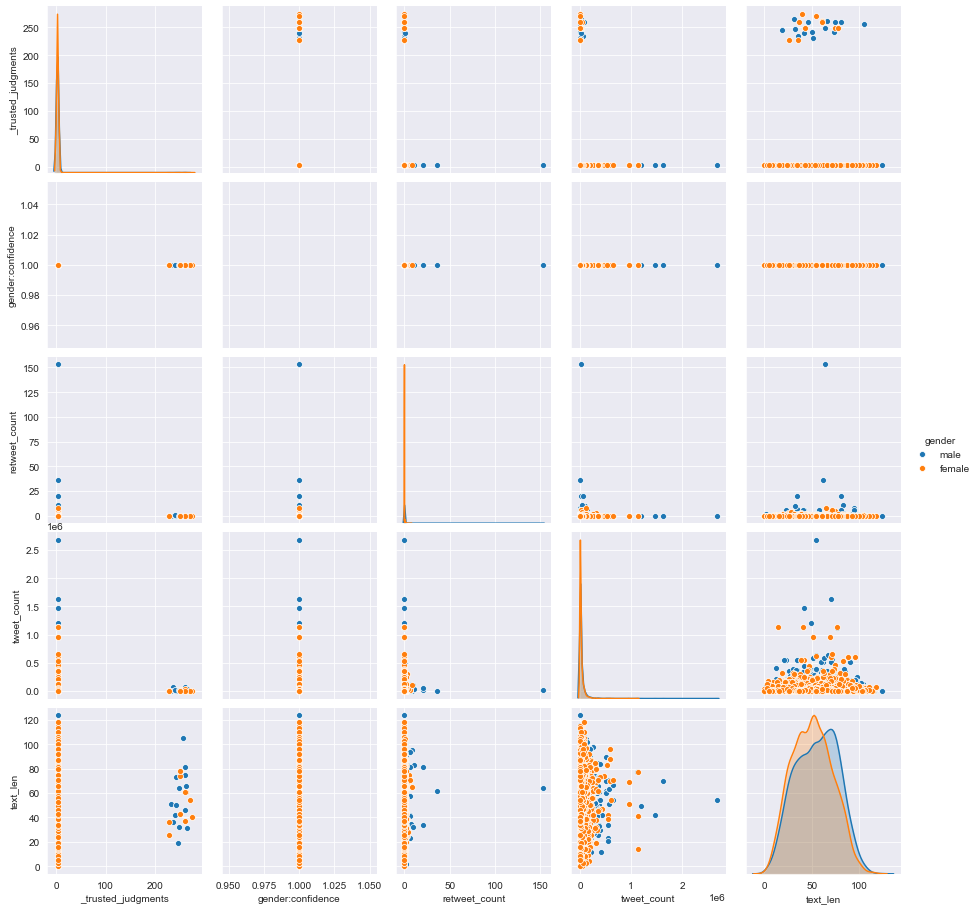

In [ ]:
sns.pairplot(dataset_new,hue='gender')

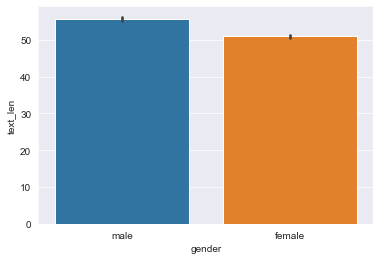

In [ ]:
sns.barplot(x='gender',y='text_len',data=dataset_new)

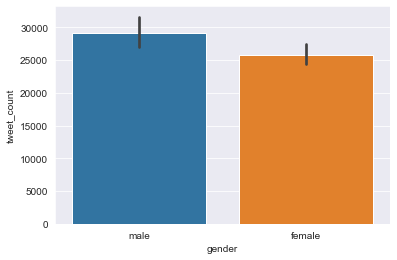

In [ ]:
sns.barplot(x='gender',y='tweet_count',data=dataset_new)


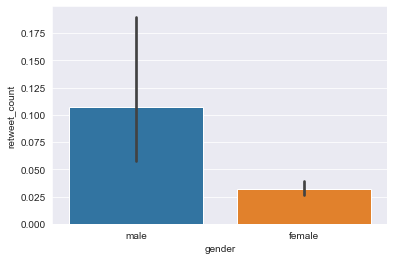

In [ ]:
sns.barplot(x='gender',y='retweet_count',data=dataset_new)

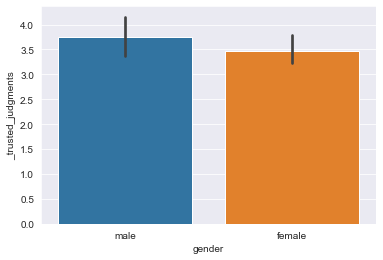

In [ ]:
sns.barplot(x='gender',y='_trusted_judgments',data=dataset_new)

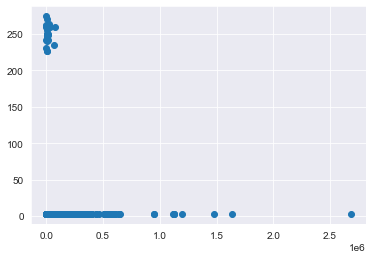

In [ ]:
plt.scatter(x=dataset_new['tweet_count'],y=dataset_new['_trusted_judgments'])

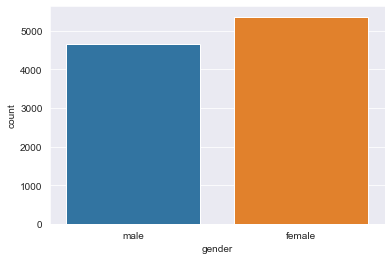

In [ ]:
sns.countplot(x='gender',data=dataset_new)

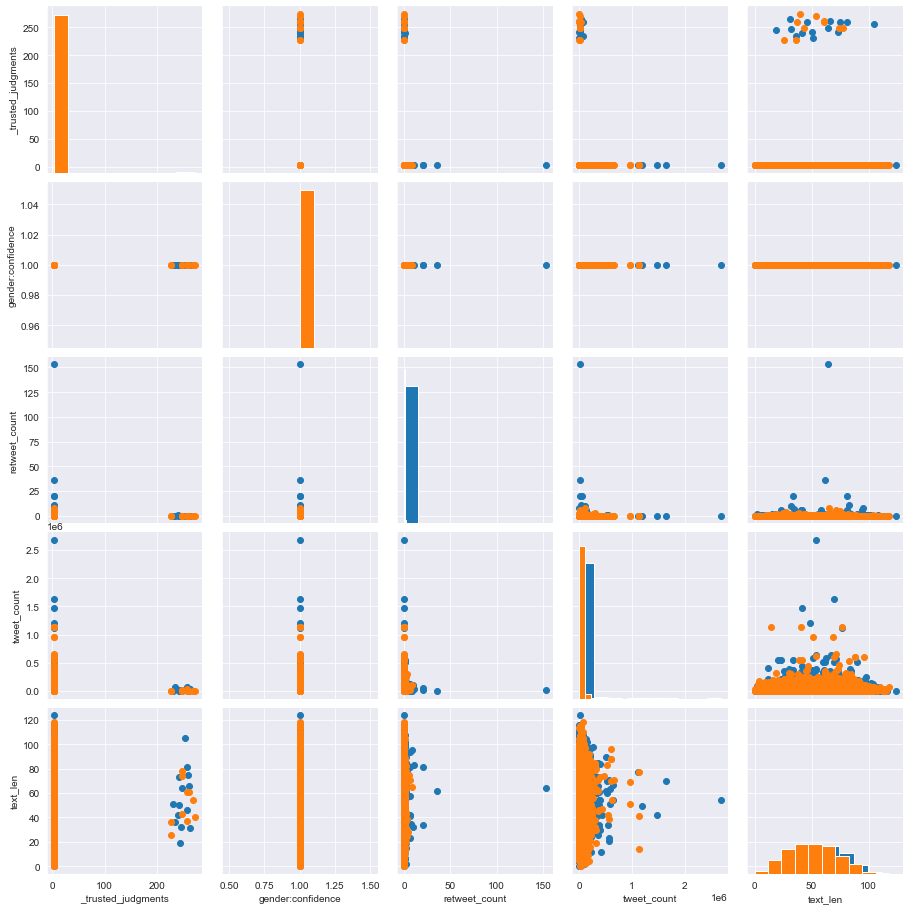

In [ ]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(dataset_new,hue='gender')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)

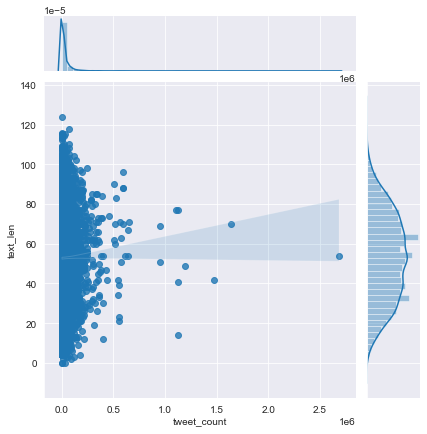

In [ ]:
g = sns.JointGrid(x="tweet_count", y="text_len", data=dataset_new)
g = g.plot(sns.regplot, sns.distplot)

1st Question

In [ ]:
male_text = dataset_new[dataset_new["gender"] == 'male']['clean_text']
female_text = dataset_new[dataset_new['gender']=='female']['clean_text']

In [ ]:
male_corpus=[]
for i in male_text:
    message = i.lower()
    message = message.split()
    ps = PorterStemmer()
    all_words = stopwords.words('english')
    message = [ps.stem(word) for word in message if not word in set(all_words)]
    message = ' '.join(message)
    male_corpus.append(message)

In [ ]:
male_words={}
for i in range(0,len(male_corpus)):
    text = male_corpus[i].split(' ')
    for word in text:
        if word in male_words:
            male_words[word]+=1
        else:
            male_words.update({word:1})
male_all_words = pd.Series(male_words)
top_10_male = male_all_words.sort_values(ascending=False)[:11].to_dict()
print(top_10_male)

{'get': 337, 'like': 300, 'im': 293, 'go': 231, 'one': 214, 'time': 201, 'dont': 195, 'love': 176, 'make': 175, 'new': 167, 'look': 164}


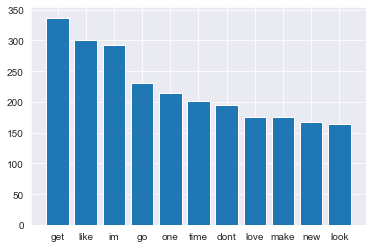

In [ ]:
plt.bar(range(len(top_10_male)), top_10_male.values())
plt.xticks(range(len(top_10_male)), list(top_10_male.keys()))
plt.show()

In [ ]:
female_corpus=[]
for i in female_text:
    message = i.lower()
    message = message.split()
    ps = PorterStemmer()
    all_words = stopwords.words('english')
    message = [ps.stem(word) for word in message if not word in set(all_words)]
    message = ' '.join(message)
    female_corpus.append(message)

In [ ]:
female_words={}
for i in range(0,len(female_corpus)):
    text = female_corpus[i].split(' ')
    for word in text:
        if word in female_words:
            female_words[word]+=1
        else:
            female_words.update({word:1})
        
female_all_words = pd.Series(female_words)
top_10_female = female_all_words.sort_values(ascending=False)[:11].to_dict()
print(top_10_female)

{'im': 529, 'like': 386, 'get': 384, 'go': 329, 'day': 304, 'love': 303, 'one': 287, 'make': 242, 'dont': 238, 'time': 232, 'peopl': 202}


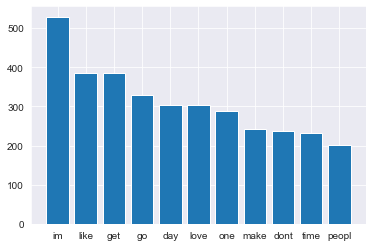

In [ ]:
plt.bar(range(len(top_10_female)), top_10_female.values())
plt.xticks(range(len(top_10_female)), list(top_10_female.keys()))
plt.show()

In [ ]:
male_all_words=list(male_words.keys())
print(male_all_words[:11])

['robbi', 'e', 'respond', 'critic', 'win', 'eddi', 'edward', 'worldtitleseri', 'felt', 'like', 'friend']


In [ ]:
female_all_words=list(female_words.keys())
print(female_all_words[:11])

['watch', 'neighbour', 'sky', 'catch', 'neighb', 'xxx', 'ive', 'seen', 'peopl', 'train', 'lamp']


In [ ]:
spell = SpellChecker()
misspelled_m = spell.unknown(male_all_words)
misspelled_f = spell.unknown(female_all_words)
misspelled_m = list(misspelled_m)
misspelled_f = list(misspelled_f)
misspelled = {'males':len(misspelled_m),'felmales':len(misspelled_f)}

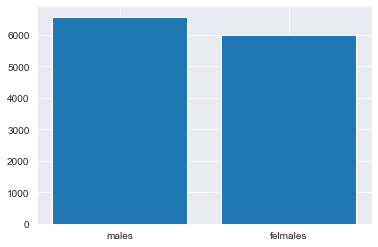

In [ ]:
plt.bar(range(len(misspelled)), misspelled.values())
plt.xticks(range(len(misspelled)), list(misspelled.keys()))
plt.show()

In [ ]:
if len(misspelled_m) > len(misspelled_f):
    print('males (%s) make more typos than females (%s)'%(len(misspelled_m),len(misspelled_f)))
else:
    print('females (%s) make more typos than males (%s)'%(len(misspelled_f),len(misspelled_m)))  

males (6569) make more typos than females (5995)


# Data preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

x = cv.fit_transform(dataset_new['clean_text']).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(dataset_new['gender'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nv = MultinomialNB()

nv.fit(x_train, y_train)

y_pred_nv = nv.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_nv)

0.6224218230206254

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

accuracy_score(y_test, y_pred_rfc)

0.582168995342648

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

accuracy_score(y_test, y_pred_dtc)

0.5538922155688623